<a href="https://colab.research.google.com/github/M-bytes/CD_Flash_DS/blob/main/Copia_de_Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/BBDD/sales_predictions_2023 (1).csv'
df = pd.read_csv(filename)

Mounted at /content/drive


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#identifying missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#checking for duplicates
df.duplicated().sum()

0

In [6]:
#identofying missing values
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
#Item weight missing values will be replaced by the mean of each Item Identifier
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [8]:
cat_means = df.groupby('Item_Identifier')['Item_Weight'].mean()

In [9]:
dic_Weight = dict(zip(cat_means.index, cat_means.values))

In [10]:
for x in df.index:
  if df.loc[x,'Item_Weight'] != np.nan:
    for a in dic_Weight.keys():
      if df.loc[x,'Item_Identifier'] == a:
        df.loc[x,'Item_Weight'] = dic_Weight[a]

In [11]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [12]:
#For the Outlet Size, I will not take into account this column as of now I cannot come up with a method to replace the missing values
df['Outlet_Size'].fillna('Missing', inplace=True)

In [13]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [14]:
#Checking if after fillinf the null values the dtypes are correct, seems like the weight is an object, we should change it to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
#dropping the last 4 rows that could not get the weight
df.dropna(subset=['Item_Weight'], inplace=True)

In [16]:
#Calculating the summarized statistics for all numeric variables
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


(array([2387.,    0.,    0.,    0.,    0., 3347.,    0.,    0.,    0.,
        2785.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

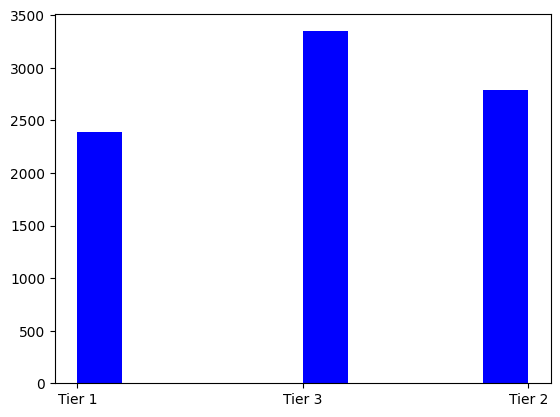

In [18]:
#plotting the data
plt.hist(df['Outlet_Location_Type'], color ='blue')

(array([5577.,    0.,    0.,  928.,    0.,    0., 1082.,    0.,    0.,
         932.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

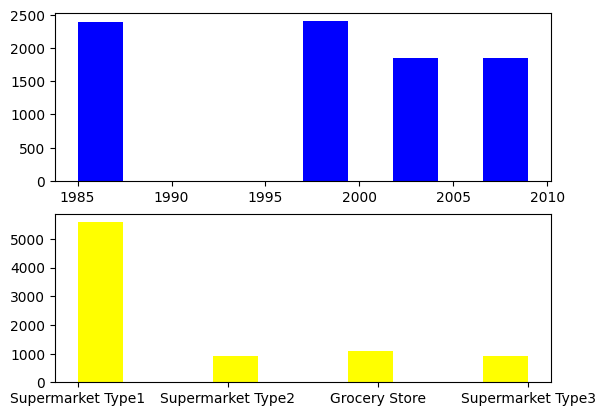

In [26]:
fig, axs = plt.subplots(2)
axs[0].hist(df['Outlet_Establishment_Year'], color ='blue')
axs[1].hist(df['Outlet_Type'], color ='yellow')

Text(0, 0.5, 'Venta')

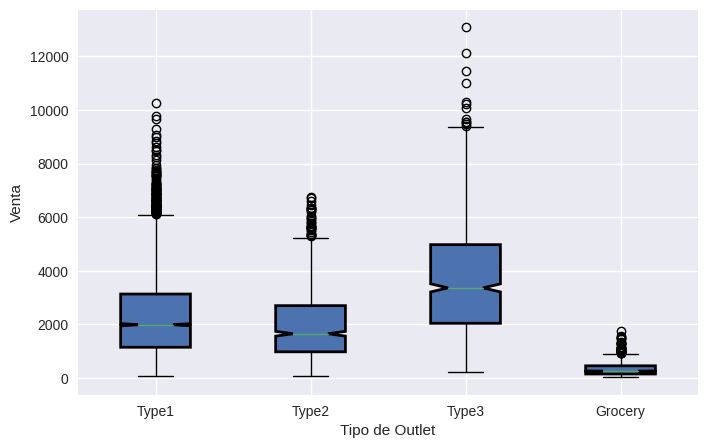

In [34]:
#boxplots
Type1 = df.loc[df['Outlet_Type']=='Supermarket Type1','Item_Outlet_Sales']
Type2 = df.loc[df['Outlet_Type']=='Supermarket Type2','Item_Outlet_Sales']
Type3 = df.loc[df['Outlet_Type']=='Supermarket Type3','Item_Outlet_Sales']
Grocery = df.loc[df['Outlet_Type']=='Grocery Store','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
axes.boxplot([Type1, Type2, Type3, Grocery], notch = True, labels=['Type1', 'Type2', 'Type3', 'Grocery'],
             patch_artist=True,
             boxprops = dict(linestyle = '-', linewidth= 2))
plt.xlabel('Tipo de Outlet')
plt.ylabel('Venta')

In [35]:
import seaborn as sns

<ipython-input-37-1b96051f1858>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

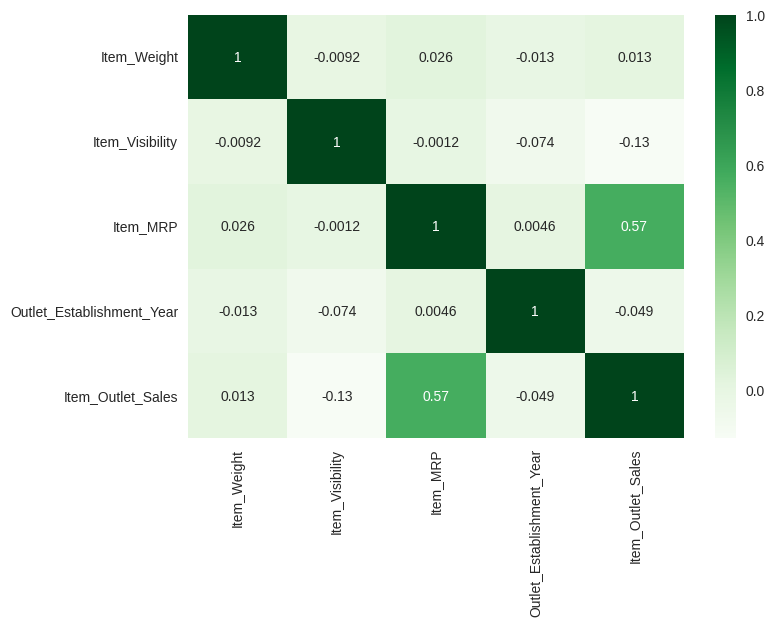

In [37]:
# se puede apreciar una leve correlación entre el Item MRP y las ventas del outlet, pero el resto de las variables presentan nula correlación
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)